In [2]:
# Change to root directory to ensure plots are saved in the correct location
import os
current_dir = os.getcwd()
# Find the root directory by looking for .git folder
root_dir = current_dir
while not os.path.exists(os.path.join(root_dir, '.git')) and root_dir != '/':
    root_dir = os.path.dirname(root_dir)
    
# Change to root directory if found, otherwise stay in current directory
if os.path.exists(os.path.join(root_dir, '.git')):
    os.chdir(root_dir)
    print(f"Changed working directory to: {root_dir}")
else:
    print(f"Staying in current directory: {current_dir}")



Changed working directory to: /home/dryogurt/Documents/Habitats/Aero-Design-Team-Gamma


Aircraft Longitudinal Dynamics

  1004.8 :V0 (ft/s) level cruise
 --- longitudinal aerodynamic stability derivatives ---
     -0.00034   -0.00466    0.00000    0.00000
      0.00307   -0.04285   -0.00109    0.00000
    -45.58096 1003.13214   -0.05653    1.00000
    -32.17399   -0.02548   -0.00000    0.00000
 --- control derivatives ---
     -0.11591    0.00000
     -1.38349    0.00000
     -0.12250    0.00000
      0.00000    0.00000
 --- time array --- 
  0 0.01 500 :i.e. t=(0:0.01:500)
 --- step inputs ---
      -0.1745 :elevator deflection, eta (rad) [1 deg = 0.0175 rad]
      10.0000 :engine thrust increment, tau
 --- feedback control ---
   -0.0    -1.0  :axial velocity gains (eta tau)
   -0.2    -1.2  :normal velocity gains
   -1.4    -1.0  :pitch rate gains
   -1.3    -1.3  :pitch attitude gains
 --- end ---

[A]:
 -1.3953e+00 -4.6564e-03 -4.7913e-03 -3.4175e+01
 -1.6326e+00 -4.2848e-02 -2.2493e-02 -2.5477e-02
 -4.7158e+01  1.0031e+03 -2.2488e-01 -1.5964e-01
  0.0000e+00  0.0000

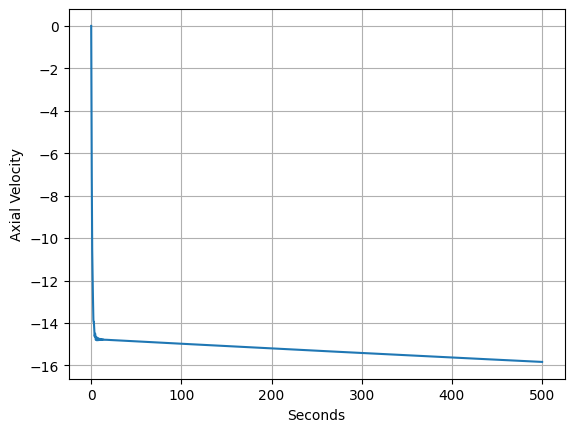

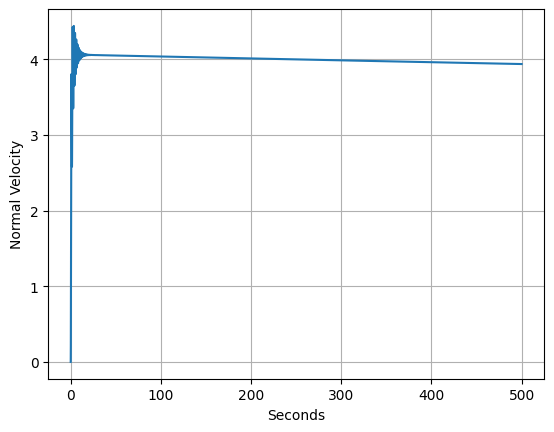

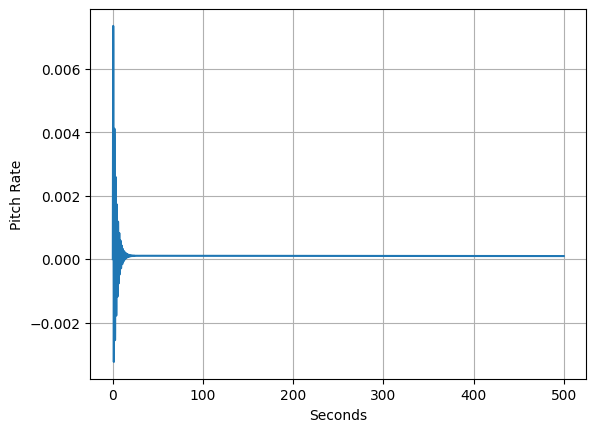

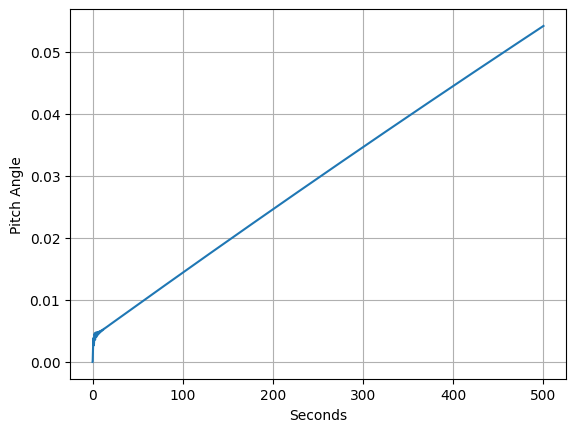

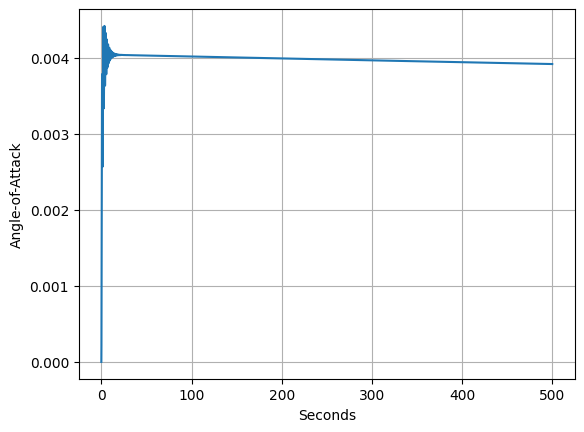

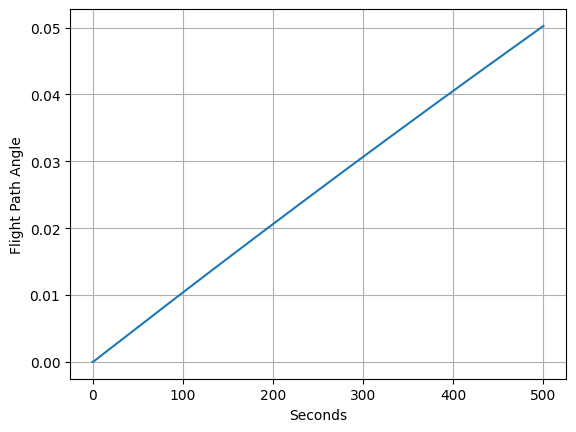

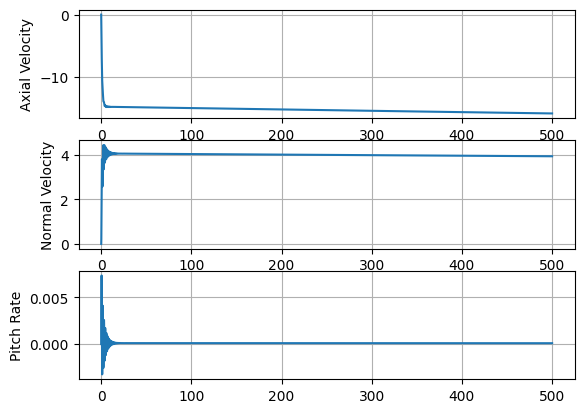

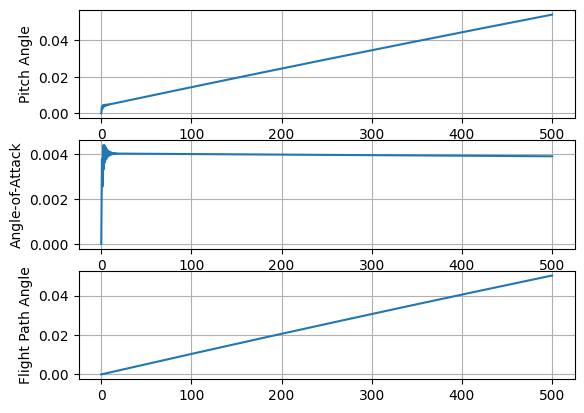

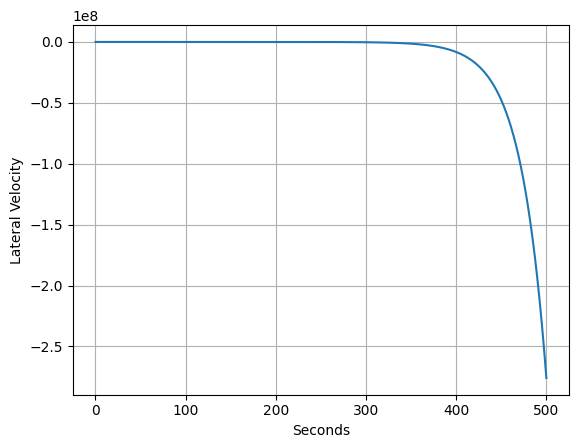

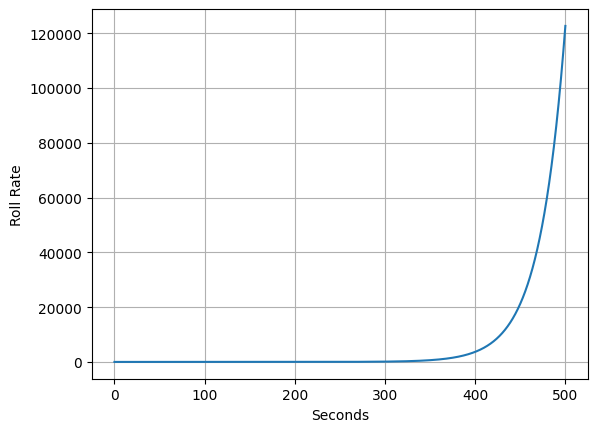

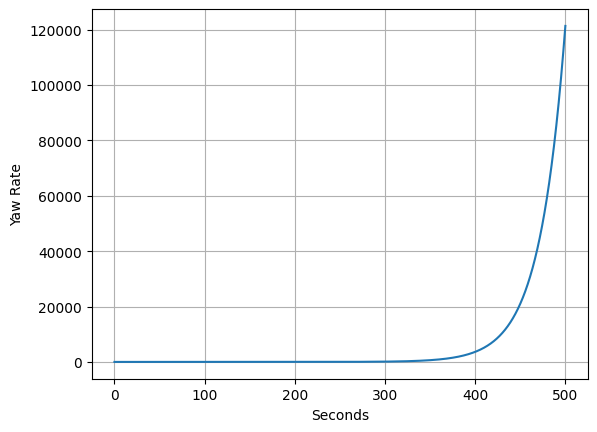

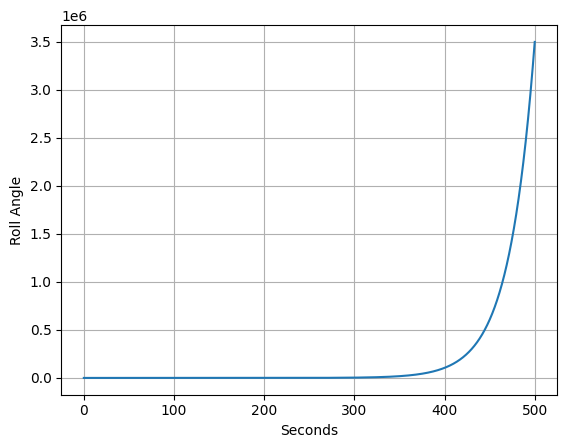

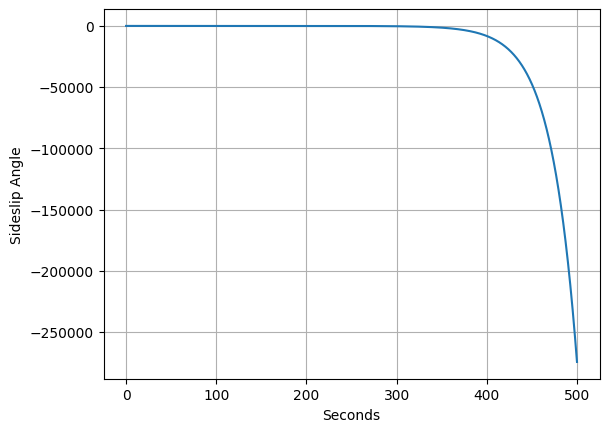

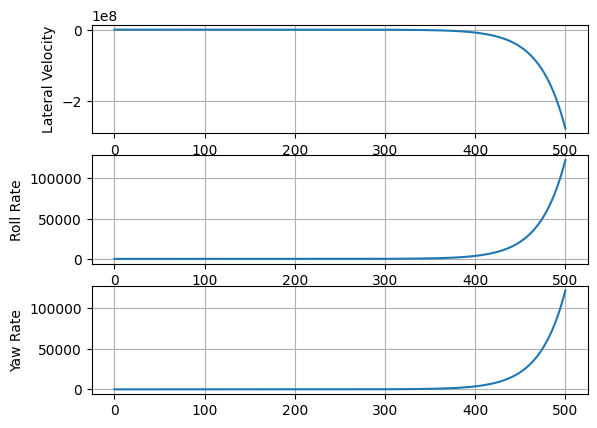

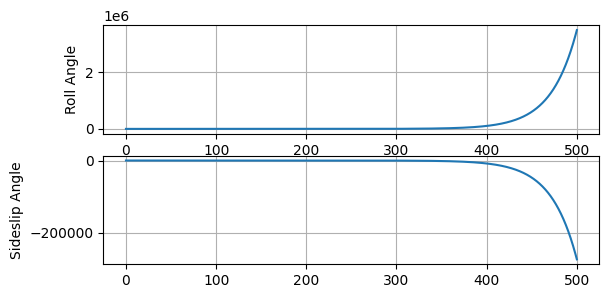

In [9]:
from aircraft_design.final_design.final_trade_studies.dynamic_stability_trade_study import analyze_aircraft_dynamic_stability
from aircraft_design.final_design.final_construction import Aircraft
import numpy as np
# prepare for optimization
aircraft = Aircraft()

# good short period
test_gains = {'ko_long': [-1.3032519997683814, -1.3369288062892695],
           'kq': [-1.3742821242820142, -1.0245150979564492],
           'ku': [-0.03911437512047744, -1.0050226930594066],
           'kw': [-0.1747477841102023, -1.167616876420973],
            'kv': [-0.01764108, -0.00454934],
            'kp': [-2.,  0.],
            'kr': [-1.64769301, -2.        ],
            'ko_lat': [-1.43494421e+00, -1.07675308e-05]
           }

deflections = {'eta': np.radians(-10),
               'tau': 10,
               'xi': np.radians(2),
               'zeta': np.radians(0),
               'tpar': [0, 0.01, 100]}

short_nf, short_df, p_nf, p_df, dnf, ddr, Tr, Ts = analyze_aircraft_dynamic_stability(aircraft, **test_gains, **deflections, visualize=True)
print(f"short_nf: {short_nf}, short_df: {short_df}, p_nf: {p_nf}, p_df: {p_df}, dnf: {dnf}, ddr: {ddr}, Tr: {Tr}, Ts: {Ts}")

In [4]:
from atmosphere import Atmosphere

flight_conditions = [
    # M, h
    (0.25, 0),
    (0.5,20e3),
    (0.5,36e3),
    (0.9,40e3)
]
flight_conditions_stability_params = []
for M, h in flight_conditions:
    rho = Atmosphere(h).density
    a = Atmosphere(h).speed_of_sound
    V0 = M * a
    flight_conditions_stability_params.append((V0,rho))

short_nf, short_df, p_nf, p_df, dnf, ddr, Tr, Ts = analyze_aircraft_dynamic_stability(aircraft, **test_gains, **deflections, visualize=True)
print(f"short_nf: {short_nf}, short_df: {short_df}, p_nf: {p_nf}, p_df: {p_df}, dnf: {dnf}, ddr: {ddr}, Tr: {Tr}, Ts: {Ts}")

ModuleNotFoundError: No module named 'atmosphere'